In [1]:
%matplotlib inline

from consts import * 

import numpy as np
import scipy as sp
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.fftpack import fft,fftshift

import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.display import Image
import os
import re

import h5py

ImportError: No module named h5py

In [ ]:
workdir='D:\\genesis\\examples\\visa1'
os.chdir(workdir)

In [202]:
def complexify_phase(a):
    m,n=a.shape
    b=np.zeros((m,n),dtype=complex)
    for i in np.arange(m):
        for j in np.arange(n):
            b[i,j]=np.complex(np.cos(a[i,j]),np.sin(a[i,j]))
    return b

def gen2spectrum(phase,amp,N=0):
    nt,nz=amp.shape
    if N>nt:
        nt=N
    spectrum=np.zeros((nt,nz))
    phase1=complexify_phase(phase)
    #np.savetxt('phase1.dat',phase1,fmt='%12.4E')
    for i in np.arange(nz):
        signal=np.sqrt(amp[:,i])*phase1[:,i]
        spectrum[:,i]=np.abs(fftshift(fft(signal,nt)))
        spectrum[:,i]=spectrum[:,i]*spectrum[:,i]
    return spectrum

## hdf5->ascii

In [50]:
f=h5py.File('template.out.h5', 'r')
#f.keys()
for name,value in f.items():
    #print name,value
    match=re.search(r'<HDF5 dataset',`value`)
    if match:
        data=f[name]
        np.savetxt(name+'.dat',data[...],fmt='%12.4E')

In [195]:
amp=np.loadtxt('signalamp.dat')
phase=np.loadtxt('signalphase.dat')
amp=amp[:,224:-1]
phase=phase[:,224:-1]

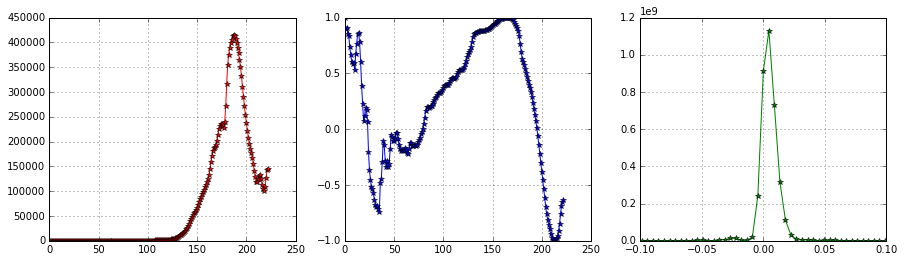

In [226]:
N=0
spectrum=gen2spectrum(phase,amp,N)
np.savetxt('spectrum.dat',spectrum,fmt='%12.4E')

N=223
n=np.arange(223)
a1=amp[:,150]
p1=np.cos(phase[:,150])

X=spectrum[:,150]
F=1.0*np.arange(-N/2,N/2)/N

fig,axes=plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
axes[0].plot(n,a1,'r*-')
axes[1].plot(n,p1,'b*-')
axes[2].plot(F,X,'g*-')
axes[2].axis([-0.1,0.1,0,1.2e9])
axes[0].grid()
axes[1].grid()
axes[2].grid()

In [221]:
freq=g_c/8.44e-7
transit_time=4/g_c
print transit_time
1.8e-2/g_c*freq

1.33425638079e-08


21327.014218009477

## FFT example

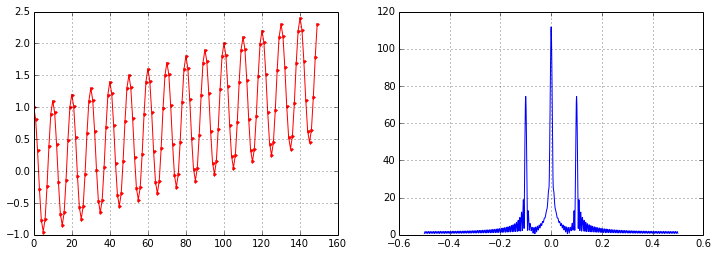

In [11]:
n = np.arange(150)
x1 = np.cos(2.*np.pi*n/10.)+n/100.#+np.cos(2.*np.pi*n/5.)/2
N = 2048
X = np.abs(fft(x1,N))
X = fftshift(X)
F = 1.0*np.arange(-N/2,N/2)/N
#F = 1.0*np.arange(N)/N

fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].plot(n,x1,'r.-')
axes[1].plot(F,X,'b-')
axes[0].grid()
axes[1].grid()

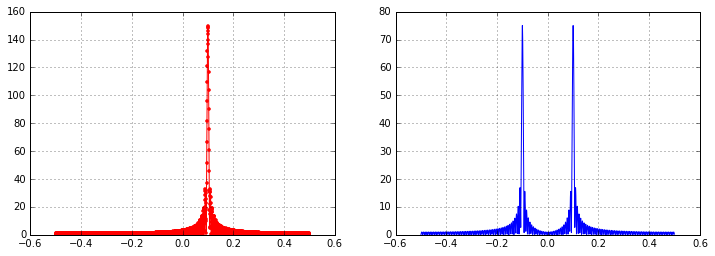

In [206]:
n = np.arange(150)
x1 = np.cos(2.*np.pi*n/10.)

N = 2048
X = np.abs(fft(x1,N))
X = fftshift(X)
F = 1.0*np.arange(-N/2,N/2)/N

x2 = np.zeros(150,dtype=complex)
for i in np.arange(150):
    x2[i]=np.complex(np.cos(2.*np.pi*i/10.),np.sin(2.*np.pi*i/10.))
X2 = np.abs(fft(x2,N))
X2 = fftshift(X2)

fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].plot(F,X2,'r.-')
axes[1].plot(F,X,'b-')
axes[0].grid()
axes[1].grid()

In [25]:
f=h5py.File('template.out.fld.h5', 'r')
f.keys()

[u'gridsize',
 u'refposition',
 u'slicecount',
 u'slicespacing',
 u'step000000',
 u'step000020',
 u'step000040',
 u'step000060',
 u'step000080',
 u'step000100',
 u'step000120',
 u'step000140',
 u'step000160',
 u'step000180',
 u'step000200',
 u'step000220',
 u'wavelength']

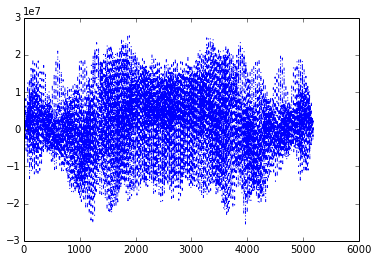

In [41]:
fld=f['step000200/slice000500/field'].value
#print fld.keys()
#print par_x.shape#,par_x[...]
#np.savetxt('z2.dat',par_x[...],fmt='%12.4E')
plt.plot(fld[::10],'-.')
plt.show()